# Simple benchmark example

In [1]:
import sys
sys.path.append('../benchmark')
from benchmark.runs.passes import PassesRun
from benchmark.dataset import Dataset
from benchmark.main import Benchmark
from benchmark.runs.pre_encoded import PreEncodedRun
from benchmark.runs.warmup import Warmup
from benchmark.runs.run import Run



/opt/homebrew/Caskroom/miniforge/base/envs/llm-efficiency-benchmark/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/homebrew/Caskroom/miniforge/base/envs/llm-efficiency-benchmark/lib/python3.11/site-packages/ipykernel_launch

In [18]:

# With encoding
model: str = "EleutherAI/pythia-70m"
dataset: Dataset = Dataset(name="Rowan/hellaswag", split="train", column="ctx")

# Configure runs
warmup : Run = Warmup(model=model, dataset=dataset, passes=100)
run1: Run = PassesRun(model=model, dataset=dataset, passes=1)
run5: Run = PassesRun(model=model, dataset=dataset, passes=5)
run10: Run = PassesRun(model=model, dataset=dataset, passes=10)
run20: Run = PassesRun(model=model, dataset=dataset, passes=20)
run40: Run = PassesRun(model=model, dataset=dataset, passes=40)
run100: Run = PassesRun(model=model, dataset=dataset, passes=100)
run200: Run = PassesRun(model=model, dataset=dataset, passes=200)
run500: Run = PassesRun(model=model, dataset=dataset, passes=500)

# Configure classes
benchmark = Benchmark(name= "with_encoding", runs=[warmup, run1, run5, run10, run20, run40, run100, run200, run500])

benchmark.run()

print(benchmark.collect_results())

Total progress:  11%|█         | 1/9 [00:36<04:48, 36.00s/it][codecarbon WARNING @ 20:07:39] Multiple instances of codecarbon are allowed to run at the same time.

Total progress:  22%|██▏       | 2/9 [00:44<02:17, 19.71s/it][codecarbon WARNING @ 20:07:47] Multiple instances of codecarbon are allowed to run at the same time.

Total progress:  33%|███▎      | 3/9 [00:55<01:34, 15.80s/it][codecarbon WARNING @ 20:07:58] Multiple instances of codecarbon are allowed to run at the same time.

Total progress:  44%|████▍     | 4/9 [01:10<01:16, 15.31s/it][codecarbon WARNING @ 20:08:13] Multiple instances of codecarbon are allowed to run at the same time.

Total progress:  56%|█████▌    | 5/9 [01:32<01:10, 17.72s/it][codecarbon WARNING @ 20:08:35] Multiple instances of codecarbon are allowed to run at the same time.

Total progress:  67%|██████▋   | 6/9 [02:08<01:12, 24.24s/it][codecarbon WARNING @ 20:09:12] Multiple instances of codecarbon are allowed to run at the same time.

Total progress: 

{'benchmark_name': 'with_encoding-20241203-200703', 'timestamp': '20241203-201914', 'cpu_count': 10, 'cpu_model': 'Apple M1 Pro', 'gpu_count': 1, 'gpu_model': 'Apple M1 Pro', 'os': 'macOS-15.1-arm64-arm-64bit', 'country_name': 'Netherlands', 'country_iso_code': 'NLD', 'region': None, 'python_version': '3.11.10', 'codecarbon_version': '2.7.2', 'longtitude': None, 'latitude': None, 'ram_total_size': 16.0, 'cpu_power': np.float64(0.3591), 'gpu_power': np.float64(0.006299999999999998), 'ram_power': 6.0, 'total_duration': 687.8039745840069, 'total_cpu_energy': np.float64(0.0003473951266982448), 'total_gpu_energy': np.float64(1.3099894054641376e-06), 'total_ram_energy': 0.0006679608470800547, 'runs': [{'name': 'passes', 'passes': 1, 'model': 'EleutherAI/pythia-70m', 'dataset': 'Rowan/hellaswag', 'timestamp': '2024-12-03T20:07:47', 'duration': 7.36558108299505, 'cpu_energy': np.float64(8.068146581127075e-08), 'gpu_energy': np.float64(7.1463652592210535e-09), 'ram_energy': 1.3478554849765108e-

In [ ]:
# Without encoding
model: str = "EleutherAI/pythia-70m"
dataset: Dataset = Dataset(name="Rowan/hellaswag", split="train", column="ctx")

# Configure runs
# warmup: Run = Warmup(model=model, dataset=dataset, passes=1)

warmup: Run = Warmup(model=model, dataset=dataset, passes=100)
run1: Run = PreEncodedRun(model=model, dataset=dataset, passes=1)
run5: Run = PreEncodedRun(model=model, dataset=dataset, passes=5)
run10: Run = PreEncodedRun(model=model, dataset=dataset, passes=10)
run20: Run = PreEncodedRun(model=model, dataset=dataset, passes=20)
run40: Run = PreEncodedRun(model=model, dataset=dataset, passes=40)
run100: Run = PreEncodedRun(model=model, dataset=dataset, passes=100)
run200: Run = PreEncodedRun(model=model, dataset=dataset, passes=200)
run500: Run = PreEncodedRun(model=model, dataset=dataset, passes=500)

# Configure classes
benchmark = Benchmark([warmup, run1, run5, run10, run20, run40, run100, run200, run500])

benchmark.run()

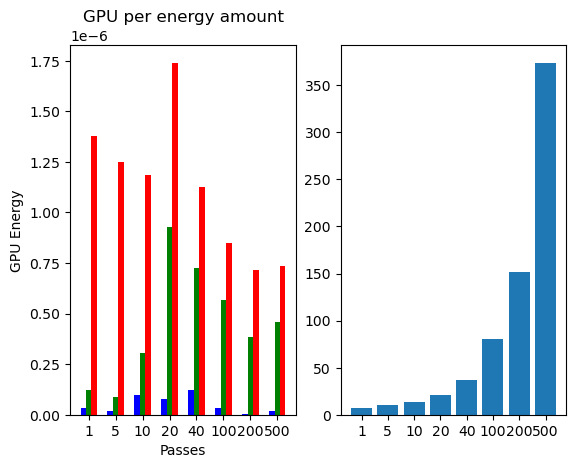

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import json


# Graph data


def data_from_json(file: str, type: str) -> [float]:
    data = json.load(open(file))

    return [data["runs"][0][type], data["runs"][1][type], data["runs"][2][type], data["runs"][3][type], data["runs"][4][type], data["runs"][5][type], data["runs"][6][type], data["runs"][7][type]]


x = np.arange(8)

results1 = data_from_json("resultsV2.json", "gpu_energy")
results2 = data_from_json("resultsV3.json", "gpu_energy")
results3 = data_from_json("results_with_encoding-20241203-174821.json", "gpu_energy")
results4 = data_from_json("results_with_encoding-20241203-195144.json", "gpu_energy")
results5 = data_from_json("results_with_encoding-20241203-200703.json", "gpu_energy")

ram_energy1 = data_from_json("resultsV2.json", "ram_energy")
ram_energy2 = data_from_json("resultsV3.json", "ram_energy")
ram_energy3 = data_from_json("results_with_encoding-20241203-174821.json", "ram_energy")
ram_energy4 = data_from_json("results_with_encoding-20241203-195144.json", "ram_energy")
ram_energy5 = data_from_json("results_with_encoding-20241203-200703.json", "ram_energy")

cpu_energy1 = data_from_json("resultsV2.json", "cpu_energy")
cpu_energy2 = data_from_json("resultsV3.json", "cpu_energy")
cpu_energy3 = data_from_json("results_with_encoding-20241203-174821.json", "cpu_energy")
cpu_energy4 = data_from_json("results_with_encoding-20241203-195144.json", "cpu_energy")
cpu_energy5 = data_from_json("results_with_encoding-20241203-200703.json", "cpu_energy")

duration1 = data_from_json("resultsV2.json", "duration")
duration2 = data_from_json("resultsV3.json", "duration")
duration3 = data_from_json("results_with_encoding-20241203-174821.json", "duration")
duration4 = data_from_json("results_with_encoding-20241203-195144.json", "duration")
duration5 = data_from_json("results_with_encoding-20241203-200703.json", "duration")


x_values = [1, 5, 10, 20, 40, 100, 200, 500]

gpu = np.divide(np.mean([results1, results2, results3, results4, results5], axis=0), x_values)
ram = np.divide(np.mean([ram_energy1, ram_energy2, ram_energy3, ram_energy4, ram_energy5], axis=0), x_values)
cpu = np.divide(np.mean([cpu_energy1, cpu_energy2, cpu_energy3, cpu_energy4, cpu_energy5], axis=0), x_values)
time = np.mean([duration1, duration2, duration3, duration4, duration5], axis=0)

x_labels = ["1", "5", "10", "20", "40", "100", "200", "500"]
plt.subplot(1, 2, 1)
plt.bar(x-0.2, gpu, color="b", align="center", width=0.2)
plt.bar(x+0.2, ram, color="r", align="center", width=0.2)
plt.bar(x, cpu, color="g", align="center", width=0.2)

plt.xlabel("Passes")
plt.ylabel("GPU Energy")
plt.title("GPU per energy amount")
plt.xticks(x, x_labels)

plt.subplot(1, 2, 2)
plt.bar(x, time)
plt.xticks(x, x_labels)

plt.show()
